In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [5]:
pd.read_csv('gd_predict_1118.txt', names = ['line','date','hour','y'],
           header = None)

,line,date,hour,y
0,线路10,20150101,6,681
1,线路15,20150101,6,253
2,线路10,20150101,7,2337
3,线路15,20150101,7,1214
4,线路10,20150101,8,3347
5,线路15,20150101,8,1902
6,线路10,20150101,9,2717
7,线路15,20150101,9,1489
8,线路10,20150101,10,2761
9,线路15,20150101,10,1425


In [8]:
s = [('2015010620', 749), ('2015010621', 747), 
     ('2015010706', 471), ('2015010707', 1744), 
     ('2015010708', 2177), ('2015010709', 1387), 
     ('2015010710', 1096), ('2015010711', 939)]
s.sort(key=lambda x:x[0])
print(s)

[('2015010620', 749), ('2015010621', 747), ('2015010706', 471), ('2015010707', 1744), ('2015010708', 2177), ('2015010709', 1387), ('2015010710', 1096), ('2015010711', 939)]


In [3]:
train = pd.read_csv('train_features_1119.csv')
predict = pd.read_csv('predict_features_1119.csv')
print(train.shape)
print(predict.shape)

(2208, 61)
(112, 58)


In [9]:
print(train['day_sunny'])
#(train[day_sunny] and train.day_cloudy and train.day_yin and train.day_mai)
'''(train.day_zhenyu and train.day_leizhenyu and train.day_xiaoyu and 
 train.day_xiaodaozhongyu and train.day_zhongyu and train.day_zhongdaodayu and 
 train.day_dayu and train.day_dadaobaoyu)'''

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2178    1
2179    1
2180    1
2181    1
2182    1
2183    1
2184    1
2185    1
2186    1
2187    1
2188    1
2189    1
2190    1
2191    1
2192    1
2193    1
2194    1
2195    1
2196    1
2197    1
2198    1
2199    1
2200    1
2201    1
2202    1
2203    1
2204    1
2205    1
2206    1
2207    1
Name: day_sunny, dtype: int64


'(train.day_zhenyu and train.day_leizhenyu and train.day_xiaoyu and \n train.day_xiaodaozhongyu and train.day_zhongyu and train.day_zhongdaodayu and \n train.day_dayu and train.day_dadaobaoyu)'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X = train.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
y10 = train.as_matrix(columns=['line10']).ravel()
y15 = train.as_matrix(columns=['line15']).ravel()

X_train = X
X_test = X

y10_train = y10
y10_test = y10

y15_train = y15
y15_test = y15


clf10 = RandomForestRegressor(n_estimators=500)
clf10 = clf10.fit(X_train, y10_train)

clf15 = RandomForestRegressor(n_estimators=500)
clf15 = clf15.fit(X_train, y15_train)

print(clf10.score(X_train, y10_train))
print(clf10.score(X_test, y10_test))
print(clf15.score(X_train, y15_train))
print(clf15.score(X_test, y15_test))

In [18]:
def precision(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    
    #print(deviation)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()

0.741440202217


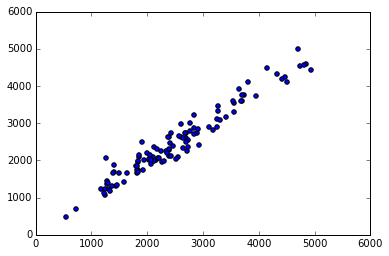

0.717119207703


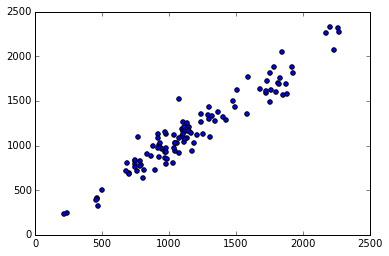

In [23]:
y10_pred_rf = clf10.predict(X_test)
y15_pred_rf = clf15.predict(X_test)

precision(y10_pred_rf,y10_test)
precision(y15_pred_rf,y15_test)

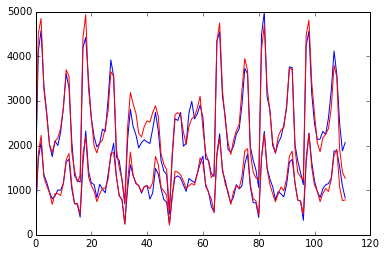

In [24]:
import matplotlib.pyplot as plt
x = [i for i in range(0,16*7)]
plt.plot(x,y10_test,color='b')
plt.plot(x,y15_test,color='b')
plt.plot(x,y10_pred_rf,color='r')
plt.plot(x,y15_pred_rf,color='r')

[0.6666666666666666, 0.5, 0.4, 0.3333333333333333]
[0.3333333333333333, 0.4, 0.5, 0.6666666666666666]
[3, 2, 1, 0]
0.0


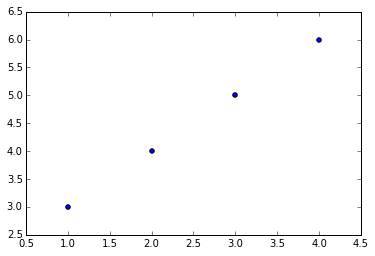

In [26]:
def precision_max_dev(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    print(deviation)
    top_dev = sorted(deviation)
    
    index_top_dev = [deviation.index(i) for i in top_dev]
    
    print(top_dev)
    print(index_top_dev)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()
    
precision_max_dev([1,2,3,4],[3,4,5,6])